## ANN Digit Recognizer Dataset with KERAS

We will work on this dataset to recognize digits 0-9

In [94]:
# import necessary libraries
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [72]:
#import digit dataset as train and test set
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [73]:
# to see first 5 rows 
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# seperate target feature as y_train and define x_train set without target feature.
y_train = train.iloc[:,0:1]
x_train = train.iloc[:,1:]


In [75]:
# to see shape of the datasets, 1st values in brackets are sample counts and 2nd values are pixels counts
x_train.shape, y_train.shape, test.shape

((42000, 784), (42000, 1), (28000, 784))

We can obtain the number of axes and dimensions of the tensor `train_images` from our previous example as follows:

In [76]:
# View number of dimensions of tensor

print(x_train.ndim)

2


In [77]:
# View the dimension of tensor

print(x_train.shape)

(42000, 784)


We need to see data type of the dataset. Keras needs Dataset as float

In [78]:
x_train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, None)

In [79]:
# scale the input values to type float32

x_train = x_train.astype('float32')
test = test.astype('float32')

Normalizing the data

In [80]:
# scale the input values within the interval [0, 1]

x_train /= 255
test /= 255

In [81]:
from keras.utils import to_categorical

- To see the effect of the transformation we can see the values before and after applying `to_categorical`:

In [82]:
y_train = to_categorical(y_train, num_classes=10)

In [83]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Seperate Train Set
Seperating the train set as train and validation set. 

We will train dataset firstly and then will test it with a validation set.


In [84]:
# seperate dataset with train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

 Now, our dataset is ready to be fed in the neural network.
 We will program it in Keras in the following section.

## Sequential class in Keras 


 The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.

 The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:


`from keras.models import Sequential`

`model = Sequential()`

 The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output. 

 In Keras, we can add the required types of layers through the **.add()** method.

## Defining the model 

 We can program the model in Keras to recognize the images of digits in the following way:

In [85]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation


model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(90, activation='relu'))
model.add(Dense(80, activation='tanh'))
model.add(Dense(70, activation='sigmoid'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(10, activation='softmax'))


 Here, the neural network has been defined as a sequence of 7 layers that are densely connected (or fully connected).

 It means that all the neurons in each layer are connected to all the neurons in the next layer.

### First layer

 We explicitly express in the `input_shape` argument of the first layer what the input data is like: a tensor that indicates that we have 784 features of the model.

 The tensor is being defined is (None, 784,).

## Model Summary 



 Keras provides a very useful method to check the architecture of the model.

 It is the **.summary()** method.

 We can use this **.summary()** method as follows:

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_23 (Dense)             (None, 80)                7280      
_________________________________________________________________
dense_24 (Dense)             (None, 70)                5670      
_________________________________________________________________
dense_25 (Dense)             (None, 60)                4260      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                3050      
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

In [109]:
#sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss="categorical_crossentropy",
              optimizer= "RMSprop",
              metrics = ['accuracy'], run_eagerly=False)

TypeError: Unexpected keyword argument passed to optimizer: nesterov

In [102]:
model.fit(x_train, y_train, batch_size=256, epochs=200)

Epoch 1/200
110/110 [==============================] - 1s 5ms/step - loss: 0.5170 - accuracy: 0.8785
Epoch 2/200
110/110 [==============================] - 0s 4ms/step - loss: 0.2553 - accuracy: 0.9225
Epoch 3/200
110/110 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.9305
Epoch 4/200
110/110 [==============================] - 1s 5ms/step - loss: 0.1889 - accuracy: 0.9416
Epoch 5/200
110/110 [==============================] - 1s 5ms/step - loss: 0.1694 - accuracy: 0.9481
Epoch 6/200
110/110 [==============================] - 0s 4ms/step - loss: 0.1504 - accuracy: 0.9531
Epoch 7/200
110/110 [==============================] - 0s 5ms/step - loss: 0.1337 - accuracy: 0.9592
Epoch 8/200
110/110 [==============================] - 0s 4ms/step - loss: 0.1214 - accuracy: 0.9630
Epoch 9/200
110/110 [==============================] - 0s 5ms/step - loss: 0.1141 - accuracy: 0.9647
Epoch 10/200
110/110 [==============================] - 1s 5ms/step - loss: 0.1047 - accura

110/110 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 82/200
110/110 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 83/200
110/110 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 84/200
110/110 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9990
Epoch 85/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.9991
Epoch 86/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 87/200
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 88/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 89/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0041 - accuracy: 0.9991
Epoch 90/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0066 - accuracy: 

110/110 [==============================] - 1s 5ms/step - loss: 0.0035 - accuracy: 0.9992
Epoch 161/200
110/110 [==============================] - 1s 6ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 162/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0023 - accuracy: 0.9993
Epoch 163/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 164/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 165/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 166/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 0.9995
Epoch 167/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 168/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 169/200
110/110 [==============================] - 1s 5ms/step - loss: 0.0031 - a

### Evaluate model with evaluate() method 


 Our model has been compiled and trained.

 Now, we come to the final step.

 The model can now be evaluated with the **evaluate()** method as follows:



In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)

434/434 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.9687


##  Accuracy of the model 



 Now, I will check the accuracy of the model.

 We can print the accuracy as follows:-



In [104]:
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.9687


##  Confusion-matrix 




 In Machine Learning, a very useful tool to evaluate the model is **Confusion Matrix**.

 It is a table with rows and columns that count the predictions in comparison with the real values. 

 This table can be used to understand the performance of the model. 

 It is very useful to show explicitly when one class is confused with another. 

 A confusion matrix for a binary classifier is shown below:-

![Confusion-Matrix for a Binary Classifier](https://miro.medium.com/max/807/1*UIFVpCx4h1yW1WqRS-2C2w.png)

 **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)** and **False Negatives (FN)** are the four different possible outcomes of a single prediction for a two-class case with classes “1” (“positive”) and “0” (“negative”).

 A **False Positive (FP)** is when the outcome is incorrectly classified as positive, when it is in fact negative. A **False Negative (FN)** is when the outcome is incorrectly classified as negative when it is in fact positive. **True Positives (TP)** and **True Negatives (TN)** are obviously correct classifications.

 With this confusion matrix, the accuracy can be calculated by adding the values of the diagonal and dividing them by the total:

**Accuracy = (TP + TN) / (TP + FP + FN + TN)**


 There is another metric called **Sensitivity (or recall)** that tells us how well the model avoids false negatives:

**Sensitivity = TP / (TP + FN)**


 From the confusion matrix, several other metrics can be obtained.

 But in this case, there are 10 classes instead of 2. So, in this case, Scikit-learn package can be used to evaluate the quality of the model by calculating the confusion matrix.

 The following code can be used to generate the confusion-matrix:

In [105]:
# Plot confusion matrix 
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

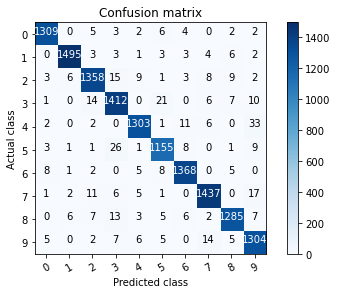

In [106]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [108]:

test_result = model.predict(test)


results = np.argmax(test_result,axis = 1) 

results = pd.Series(results,name="Label")


submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission_best.csv",index=False)